# Conditional SBM

In [1]:
from score_models import ScoreModel, MLP, VESDE
from score_models.toy_distributions import *
from score_models.plot_utils import *
import torch

/home/alexandre/anaconda3/envs/caustic/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


<Axes: >

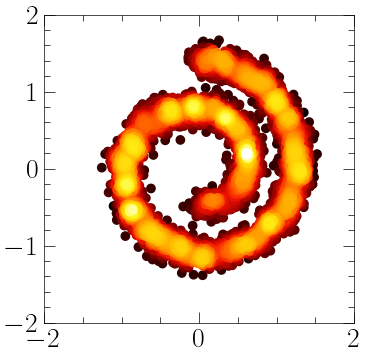

In [10]:
d = swiss_roll()

D = 4096
data = d.sample((D,))
extent = (-2, 2, -2, 2)
plot_scatter(data, extent=extent)

In [3]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data
    
    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        condition1 = (x[1] > 0).long()
        condition2 = (x[0] > 0).long()
        return x, condition1, condition2

In [4]:
net = MLP(2, width=256, layers=2, conditions=("time_discrete", "time_discrete"), condition_embeddings=(10, 10))
sde = VESDE(sigma_min=1e-2, sigma_max=10)
model = ScoreModel(net, sde)

In [5]:
dataset = Dataset(data)
model.fit(dataset, batch_size=256, learning_rate=1e-3, epochs=200, beta=0.99)

Using Karras EMA with ema lengths [0.13]
No path provided. Training checkpoints will not be saved.


Epoch 200 | Cost: 5.0e-01 | time per step 0.0209 s |: 100%|██████████| 200/200 [00:58<00:00,  3.41it/s]

Finished training after 0.016 hours.


[0.7287301011383533,
 0.6381263025105,
 0.6176722384989262,
 0.6109539158642292,
 0.6187005862593651,
 0.603309590369463,
 0.6066460125148296,
 0.6052410639822483,
 0.6165286004543304,
 0.6210999488830566,
 0.6095958631485701,
 0.6038932353258133,
 0.6101188398897648,
 0.6128895431756973,
 0.6261013820767403,
 0.6049419119954109,
 0.5910569280385971,
 0.5905547812581062,
 0.5973642207682133,
 0.5931031741201878,
 0.5900718253105879,
 0.5994023680686951,
 0.6139221601188183,
 0.6127453185617924,
 0.5852657277137041,
 0.6079516112804413,
 0.6042068377137184,
 0.5918295551091433,
 0.5993395857512951,
 0.5970133803784847,
 0.6073558442294598,
 0.6138662211596966,
 0.6052639707922935,
 0.5942762475460768,
 0.617593839764595,
 0.5932589620351791,
 0.5794537775218487,
 0.5839464440941811,
 0.5766391176730394,
 0.5958498604595661,
 0.581353846937418,
 0.5963959097862244,
 0.5825048703700304,
 0.5815963260829449,
 0.5683266334235668,
 0.599086370319128,
 0.5910946354269981,
 0.5820079185068607,

In [12]:
B = 1000
condition0 = torch.zeros(B).long()
condition1 = torch.zeros(B).long()
samples = model.sample(condition0, condition1, shape=(B, 2), steps=500)

t=0.002 | sigma=0.01 | x=-0.6±0.3: 100%|██████████| 500/500 [00:04<00:00, 106.43it/s]


<Axes: >

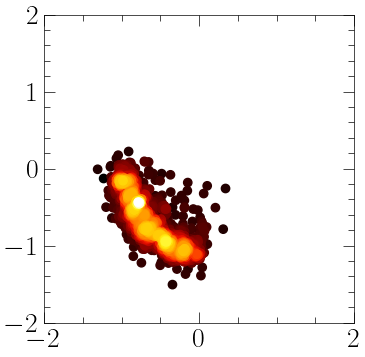

In [13]:
plot_scatter(samples, extent=extent)